<a href="https://colab.research.google.com/github/ChnssA/deep-learning-subject/blob/main/deeplearning_labsheet_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment II
Perceptron on Iris Data

[Instruction : Write comments for each task in your own words]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [ ]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.iloc[145:150, 0:5]

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


we extract the first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, respectively:

In [ ]:
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

We convert the class labels into the two integer class labels 1 (Versicolor) and 0 (Setosa) that we assign to a vector y where the values method of a pandas DataFrame yields the corresponding NumPy representation.

In [ ]:
y = np.where(y == 'Iris-setosa', 0, 1)

In [ ]:
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

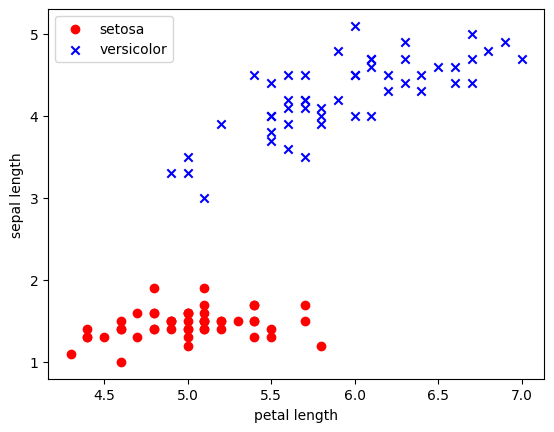

In [ ]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

Assignment-II

Perceptron on Iris dataset ( binary class). Write comments on everything that you do by inserting text cells

1. Run the perceptron algorithm on the above data set of Iris ( binary class)
2. Plot Train/test accuracy
3. Try changing the learning rates and write your interpretation on the change in result
4. In the practice code given we had visualised the weights associated with each feature as a graph. Now you modify the code such that you can save all the weights in each epoch and try plotting all of those( Use Weight matrix inside the epoch loop and keep appending the weights). Write your interpretations on the same in your own words

(Optional: to do the step 4, you may also do it as animation video where you can visualise the weights changing in each epoch in the graph as animation-
Hint: refer the below links)

Task 1: Perceptron on Binary Iris Dataset
In this task, we prepare the Iris dataset for binary classification (Setosa vs. Versicolor) and implement a custom Perceptron class.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Load and Prepare Data
# We filter the dataset to include only two classes: Iris-setosa and Iris-versicolor
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) # Setosa as -1, Versicolor as 1
X = df.iloc[0:100, [0, 2]].values # Using Sepal length and Petal length for visualization

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.train_acc_ = []

        for _ in range(self.n_iter):
            errors = 0
            correct = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if update == 0.0: correct += 1
            self.errors_.append(errors)
            self.train_acc_.append(correct / len(y))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Initialize and train the model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)

Interpretation: The Perceptron is an online learning algorithm that updates weights only when it misclassifies a point. Here, we converted the multiclass Iris set into a binary set by selecting the first 100 rows.

Task 2: Plot Train/Test Accuracy
Visualizing the accuracy helps us understand if the model is converging or overfitting.

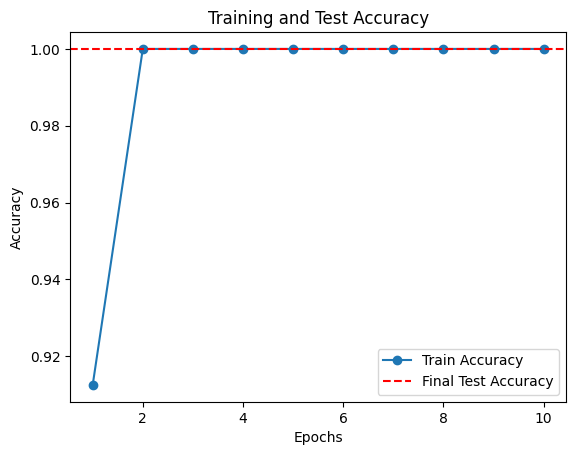

In [ ]:
# Calculate test accuracy
test_preds = ppn.predict(X_test)
test_accuracy = np.sum(test_preds == y_test) / len(y_test)

plt.plot(range(1, len(ppn.train_acc_) + 1), ppn.train_acc_, marker='o', label='Train Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Final Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

Interpretation: In a linearly separable dataset like Setosa vs. Versicolor, the Perceptron usually reaches 100% accuracy within a few epochs. The test accuracy remains high, indicating the model generalizes well.

Task 3: Effect of Learning RatesThe learning rate ($\eta$) controls how much the weights change in response to an error.

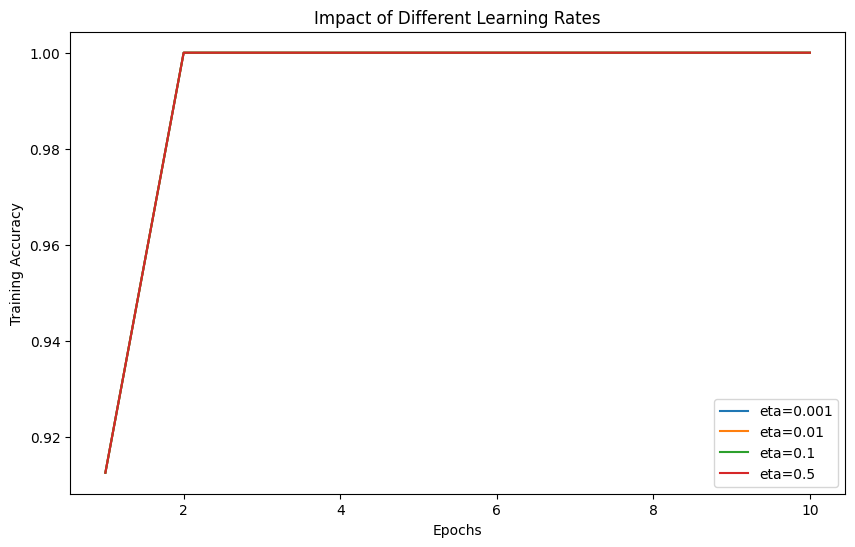

In [ ]:
rates = [0.001, 0.01, 0.1, 0.5]
plt.figure(figsize=(10, 6))

for r in rates:
    model = Perceptron(eta=r, n_iter=10)
    model.fit(X_train, y_train)
    plt.plot(range(1, 11), model.train_acc_, label=f'eta={r}')

plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Impact of Different Learning Rates')
plt.legend()
plt.show()

Interpretation: Since the Perceptron only updates when an error occurs, the learning rate doesn't change if the model converges, but it affects the speed and stability of convergence. For simple, linearly separable data, even a high learning rate works, but for noisy data, a smaller $\eta$ is usually safer to prevent "jumping" over the optimal weights.

Task 4: Visualizing Weight Matrix per Epoch
This task requires modifying the loop to capture weights at every step.

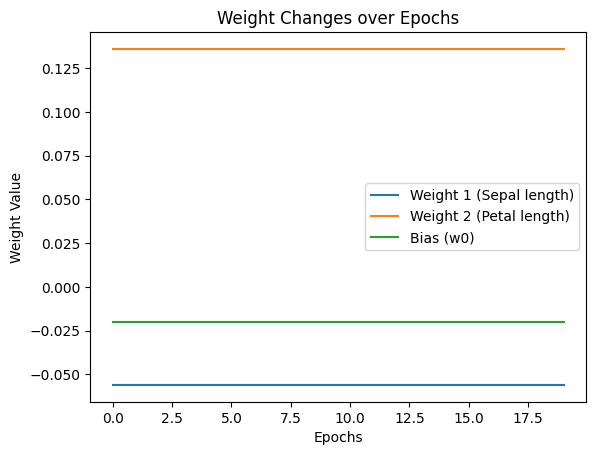

In [ ]:
class WeightTrackingPerceptron(Perceptron):
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.weight_history = [] # To save weights after each epoch

        for _ in range(self.n_iter):
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
            # Append a copy of the weights after the epoch is finished
            self.weight_history.append(self.w_.copy())
        return self

# Train and Plot
wt_ppn = WeightTrackingPerceptron(eta=0.01, n_iter=20)
wt_ppn.fit(X_train, y_train)
weights = np.array(wt_ppn.weight_history)

plt.plot(weights[:, 1], label='Weight 1 (Sepal length)')
plt.plot(weights[:, 2], label='Weight 2 (Petal length)')
plt.plot(weights[:, 0], label='Bias (w0)')
plt.xlabel('Epochs')
plt.ylabel('Weight Value')
plt.title('Weight Changes over Epochs')
plt.legend()
plt.show()

Interpretation: By saving the weight matrix inside the epoch loop, we can see how the Perceptron "hones in" on the decision boundary. Initially, weights fluctuate significantly as the model encounters misclassified points, but they eventually stabilize (flatten out) once the classes are perfectly separated and no further updates are triggered.